In [1]:
from training.abo import ABODataset, _load_template
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def analyze_distribution(data, num_classes=60):
    print(f"num classes: {len(data)}")
    
    # Sorting data by values
    sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    limited_data_keys = list(sorted_data.keys())[:num_classes]
    limited_data_values = list(sorted_data.values())[:num_classes]

    # Plotting
    plt.figure(figsize=(14, 10))
    plt.bar(limited_data_keys, limited_data_values, color='skyblue')
    plt.xlabel('Item')
    plt.ylabel('Count')
    plt.title('Distribution of Items')
    plt.xticks(rotation=90)
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

def compute_class_dict(dataset):
    classes = defaultdict(int)
    for i in tqdm(range(len(dataset))):
        class_id = str(dataset[i][1])
        classes[dataset.id_to_product_type[class_id]] += 1
    return classes

# Val set

In [3]:
config_path = "/home/ubuntu/efs/caanhqua/code/open_clip/src/training/eval_config/eval.yaml"
config = _load_template(config_path)
task_config = config["tasks"]["zeroshot_classification"]

In [4]:
abo_val = ABODataset(**task_config['dataset_specific_kwargs'])

In [5]:
val_classes = compute_class_dict(abo_val)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1503/1503 [00:05<00:00, 293.68it/s]


num classes: 57


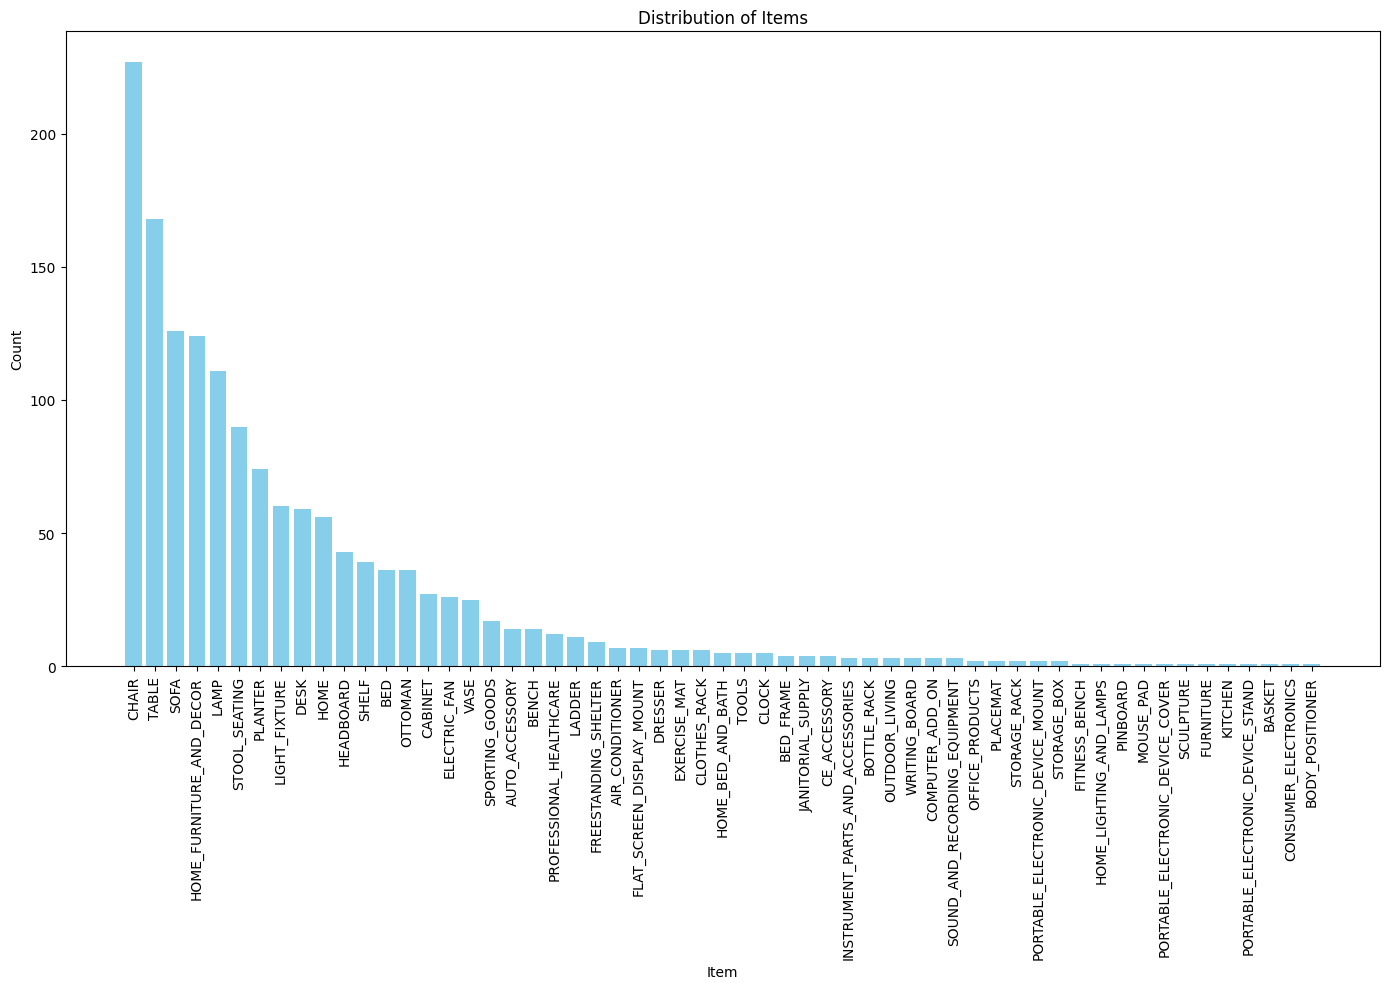

In [6]:
analyze_distribution(val_classes)

# Train set

In [7]:
config_path = "/home/ubuntu/efs/caanhqua/code/open_clip/src/training/eval_config/eval.yaml"
config = _load_template(config_path)
task_config = config["tasks"]["zeroshot_classification"]

In [10]:
task_config['dataset_specific_kwargs']['train'] = True
abo_train = ABODataset(**task_config['dataset_specific_kwargs'])

In [11]:
train_classes = compute_class_dict(abo_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 135747/135747 [11:05<00:00, 203.92it/s]


num classes: 517


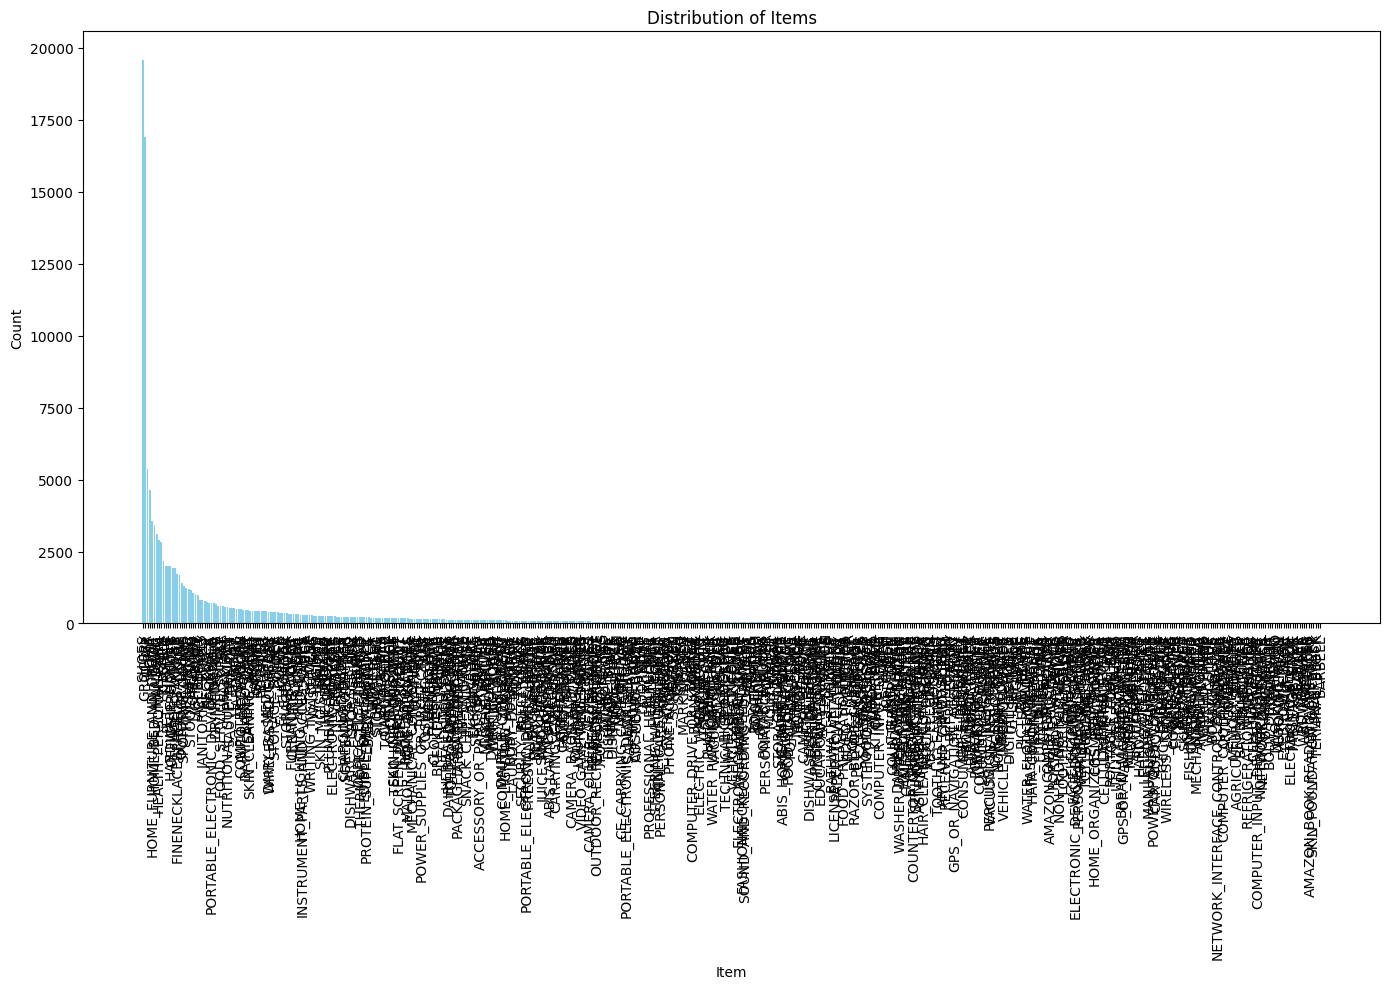

In [12]:
analyze_distribution(train_classes)